# Notebook E-tivity 3 CE4021 Task 1

Student name:Philip Clarke

Student ID:23291567

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

This Section I discuss and calculate the possible and expected value of the sum of both dice being rolled

Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.

Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:

    The expected value of your random variable. 
        Mean = (1 + 2 + 3 + 4 + 5 + 6) / 6 = 7
        
        The standard deviation of your random variable.
    Standard deviation = √((1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2) / 6 - 7^2) = √35/2
    
    Plot the distribution found in your simulated experiment with an appropriate number of 'bins'
     N.B.:

Structure your notebook as follows:
    Markdown cell with problem description
    Markdown cells with expected value and standard deviation of your random variable
    Cell(s) with experiment
    Cell(s) with outputs and graphs
    Commentary comparing calculated values to experimentally obtained values.

You may only use the following modules:
Random
Numpy
A visualisation module such as Matplotlib
Math

You are not required to perform exception handling.
You are not required to provide tests for your code.

# Section 1 - Binomial Probablilities of 2 fair dice

This section discussion probabality and uses python to work out what the values sought are

In [6]:
import matplotlib.pyplot as plt

def calculate_probabilities(num_dice, num_faces):
    if num_dice > 6 or num_dice < 2:
        raise ValueError("Number of dice should be between 2 and 6.")

    results = {}

    def helper(dice_left, current_sum):
        if dice_left == 0:
            results[current_sum] = results.get(current_sum, 0) + 1
        else:
            for i in range(1, num_faces + 1):
                helper(dice_left - 1, current_sum + i)

    helper(num_dice, 0)
    total = num_faces ** num_dice

    probabilities = {k: round(v / total, 5) for k, v in results.items()}
    return probabilities

In [7]:
num_dice = 2
num_faces = 6

In [8]:
probabilities = calculate_probabilities(num_dice, num_faces)
print(probabilities)

{2: 0.02778, 3: 0.05556, 4: 0.08333, 5: 0.11111, 6: 0.13889, 7: 0.16667, 8: 0.13889, 9: 0.11111, 10: 0.08333, 11: 0.05556, 12: 0.02778}


In [9]:
interested_values ={0,1,2,11,12}
filtered_data = {key: value for key, value in probabilities.items() if key in interested_values}
print(filtered_data)
sum_filtered_values = sum(filtered_data.values())
print(f"The sum of the filtered data values is: {sum_filtered_values}")

{2: 0.02778, 11: 0.05556, 12: 0.02778}
The sum of the filtered data values is: 0.11112


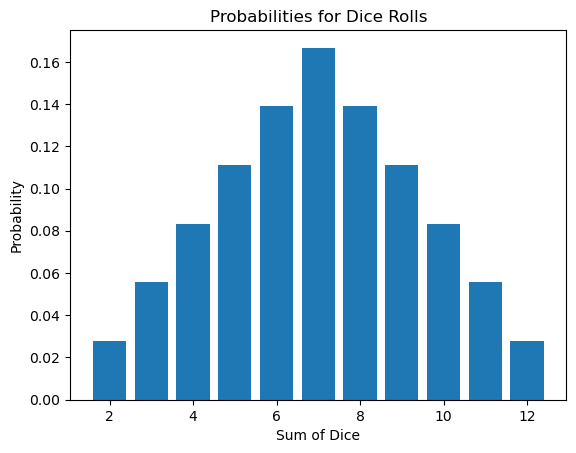

In [10]:
plt.bar(probabilities.keys(), probabilities.values())
plt.xlabel('Sum of Dice')
plt.ylabel('Probability')
plt.title('Probabilities for Dice Rolls')
plt.show()

# Section 2 - running an experiment to simulate the rolls and attempt to get the same results as above

Normalized and Sorted Frequency Distribution of Sumrolls:
2: 0.03
3: 0.06
4: 0.08
5: 0.11
6: 0.14
7: 0.17
8: 0.14
9: 0.11
10: 0.08
11: 0.06
12: 0.03


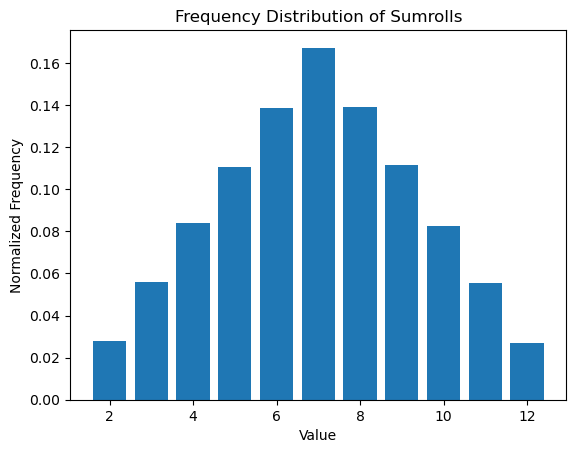

In [14]:
# Initialize an empty list to store the results
My_dice_rolls1 = []
rolls = 300000
# Simulate rolling a six-sided dice 20 times
for _ in range(rolls):
    roll1 = random.randint(1, 6)
    My_dice_rolls1.append(roll1)

# Print the results
#print("Results of rolling a six-sided dice 20 times:")
#print(My_dice_rolls1)

# Initialize an empty list to store the results
My_dice_rolls2 = []

# Simulate rolling a six-sided dice 20 times
for _ in range(200000):
    roll2 = random.randint(1, 6)
    My_dice_rolls2.append(roll2)

# Print the results
#print("Results of rolling a six-sided dice 20 times:")
#print(My_dice_rolls2)

# Create a 2x20 array using nested lists
array_2x20 = [My_dice_rolls1, My_dice_rolls2]

# Print the array
#for row in array_2x20:
  #  print(row)
    
    # Create a third list that contains the sum of values from list1 and list2
Sumrolls = [a + b for a, b in zip(My_dice_rolls1, My_dice_rolls2)]

# Create a 3x20 array using nested lists
array_3x20 = [My_dice_rolls1, My_dice_rolls2, Sumrolls]

# Print the array
#for row in array_3x20:
#    print(row)
    
from collections import Counter
import matplotlib.pyplot as plt


# Calculate the frequency distribution
frequency_distribution = Counter(Sumrolls)  # need to swap out counter here!!

# Calculate the total number of items in the list
total_items = len(Sumrolls)

# Normalize the frequency distribution by dividing counts by the total
normalized_distribution = {value: round(count / total_items,6) for value, count in frequency_distribution.items()}

# Sort the normalized distribution by value
sorted_distribution = dict(sorted(normalized_distribution.items()))

# Extract values and normalized counts
values = list(sorted_distribution.keys())
normalized_counts = list(sorted_distribution.values())

# Display the sorted, normalized distribution
print("Normalized and Sorted Frequency Distribution of Sumrolls:")
for value, normalized_count in sorted_distribution.items():
    print(f"{value}: {normalized_count:.2f}")
    
    # Create a bar chart
plt.bar(values, normalized_counts)
plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.title('Frequency Distribution of Sumrolls')
plt.show()

Simulation results for 2, 11,12 = .12 (need to round out for accuracy)

# Section 3 Convergence 

C:\Users\filcl\AppData\Local\Temp\ipykernel_19388\3105841846.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds', len(results_dict))


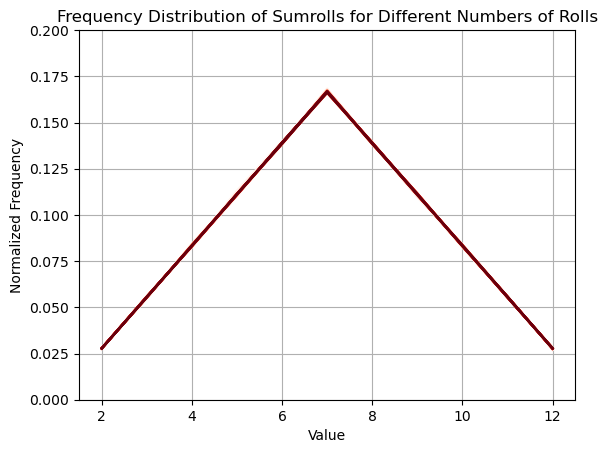

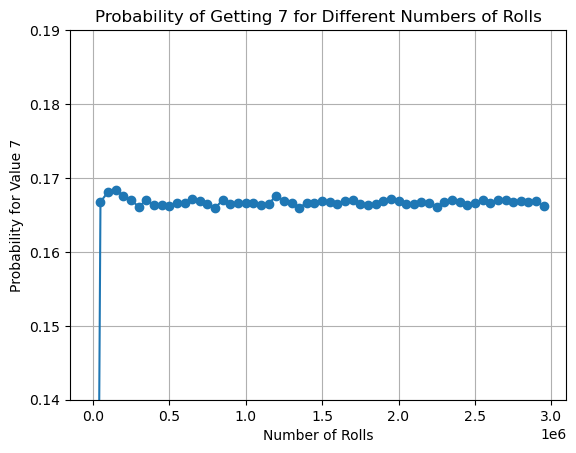

In [18]:
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter

# Initialize an empty dictionary to store the results
results_dict = {}

# Set the maximum number of rolls
max_rolls = 3000000

# Perform the simulation for different numbers of rolls
for rolls in range(1, max_rolls + 1, 50000):
    My_dice_rolls1 = [random.randint(1, 6) for _ in range(rolls)]
    My_dice_rolls2 = [random.randint(1, 6) for _ in range(rolls)]
    Sumrolls = [a + b for a, b in zip(My_dice_rolls1, My_dice_rolls2)]

    # Calculate the frequency distribution
    frequency_distribution = Counter(Sumrolls)

    # Calculate the total number of items in the list
    total_items = len(Sumrolls)

    # Normalize the frequency distribution by dividing counts by the total
    normalized_distribution = {value: count / total_items for value, count in frequency_distribution.items()}

    # Sort the normalized distribution by value
    sorted_distribution = dict(sorted(normalized_distribution.items()))

    # Store the sorted, normalized distribution in the results dictionary with the number of rolls as the key
    results_dict[rolls] = sorted_distribution

# Create a colormap for the legend
cmap = cm.get_cmap('Reds', len(results_dict))

# Plot the normalized frequency distributions for different numbers of rolls as a line plot with a heat map-style legend
for i, (rolls, distribution) in enumerate(results_dict.items()):
    values = list(distribution.keys())
    normalized_counts = list(distribution.values())

    # Create a line plot for each distribution, but on the same plot, with different colors based on the colormap
    plt.plot(values, normalized_counts, label=f'{rolls} rolls', color=cmap(i))

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.title('Frequency Distribution of Sumrolls for Different Numbers of Rolls')
plt.ylim(0, 0.2)
plt.grid()
plt.show()

# Extract the probabilities for key value = 7 from the results dictionary
probabilities_7 = {rolls: distribution.get(7, 0) for rolls, distribution in results_dict.items()}

# Plot the number of rolls versus the probabilities for key value = 7
plt.plot(list(probabilities_7.keys()), list(probabilities_7.values()), marker='o')
plt.xlabel('Number of Rolls')
plt.ylabel('Probability for Value 7')
plt.title('Probability of Getting 7 for Different Numbers of Rolls')
plt.ylim(0.14, 0.19)  # Set the y-axis limits
plt.grid()
plt.show()

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

Write you reflection in below cell.